In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
sns.set()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# reading the data in a dataframe df
imdb = pd.read_csv('/content/drive/My Drive/Dataset/IMDB Dataset.csv', encoding='latin-1')

In [ ]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
imdb.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [ ]:
text = imdb['review'][3]
print(text)
print(word_tokenize(text))

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.
['Basically', 'there', "'s", 'a', 'family', 'where', 'a', 'little', 'boy', '(', 'Jake', ')', 'thinks', 'there', "'s", 'a', 'zombie', 'in', 'his', 'closet', '&', 'his', 'parents', 'are', 'fighting', 'all', 'the', 'time.', '<', 'br', '/', '>', '<', 'br'

In [ ]:
corpus = []
for text in imdb['review']:
    words = [word.lower() for word in word_tokenize(text)]
    corpus.append(words)

In [ ]:
num_words = len(corpus)
print(num_words)

50000


Splitting Data into training(80%) and testing(20%)

In [ ]:
imdb.shape

(50000, 2)

In [ ]:
train_size = int(imdb.shape[0]*0.8)
X_train = imdb.review[:train_size]
Y_train = imdb.sentiment[:train_size]

X_test = imdb.review[train_size:]
Y_test = imdb.sentiment[train_size:]

Tokenizing the words and padding for equal input dimensions

In [ ]:
tokenizer = Tokenizer (num_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=128, truncating='post', padding='post')

In [ ]:
X_train[0], len(X_train[0])

(array([   27,     4,     1,    80,  2102,    45,  1073,    12,   100,
          147,    39,   316,  2968,   409,   459,    26,  3173,    33,
           23,   200,    14,    11,     6,   614,    48,   606,    16,
           68,     7,     7,     1,    87,   148,    12,  3256,    68,
           41,  2968,    13,    92,  5626,     2, 16202,   134,     4,
          569,    60,   271,     8,   200,    36,     1,   673,   139,
         1712,    68,    11,     6,    21,     3,   118,    15,     1,
         7870,  2257,    38, 11540,    11,   118,  2495,    54,  5662,
           16,  5182,     5,  1438,   377,    38,   569,    92,     6,
         3730,     8,     1,   360,   353,     4,     1,   673,     7,
            7,     9,     6,   431,  2968,    14,    12,     6,     1,
        11736,   356,     5,     1, 14688,  6526,  2594,  1087,     9,
         2661,  1432,    20, 22583,   534,    32,  4795,  2451,     4,
            1,  1193,   117,    29,     1,  6893,    25,  2874, 12191,
      

In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=128, truncating='post', padding='post')

In [ ]:
X_test[0], len(X_test[0])

(array([   87,   122,    10,   180,     5,   132,    12,    10,  7131,
         3717,    20,     1,  1001,  2285,     2,    10,   255,     1,
           17,  2431,    10,  1311,     5,   103,     1,   222,  6349,
            4,     3,    19,    11,    17,   974,     3,   351,     5,
          215,  1011,   415,     9,    13,   215,  1380,    56,   235,
          402,   300,     4,   316,    23,   257,    19,   961,    12,
        22250,    12,    33,    66,    61,   212,    53,    16,    11,
          113,    13,   497,     2,     1,   102,    70,  5358,    15,
            1,    88,   172,     1,   473,   824,     8,     1,    64,
           67,    54,    49,  2406,    30,    29,    33,    90,    40,
        35786,    83,    46,   438,     4,     3,    74,   220,     2,
           10,   115,    21,    63,    12,    30,    29,   268,    10,
         1059,   137,    10,    78,    21,   119,    28,    13,     1,
           88,   175,     5,   728,  3423,   108,     8,     1,    17,
      

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(40000, 128) (40000,)
(10000, 128) (10000,)


In [ ]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

Creating a LSTM base Model

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=100,
                    input_length=128, trainable=True))
model.add(LSTM(100, dropout=0.3, return_sequences=True))
model.add(LSTM(100, dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 100)          5000000   
                                                                 
 lstm (LSTM)                 (None, 128, 100)          80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5160901 (19.69 MB)
Trainable params: 5160901 (19.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/20
625/625 [==============================] - 60s 86ms/step - loss: 0.4350 - accuracy: 0.7947 - val_loss: 0.3746 - val_accuracy: 0.8285

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 83.38%


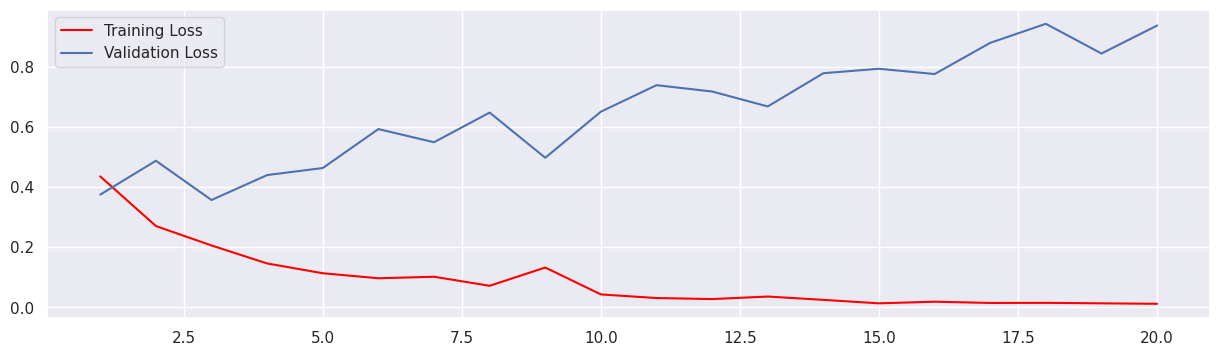

In [ ]:
plt.figure(figsize=(15,4))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()

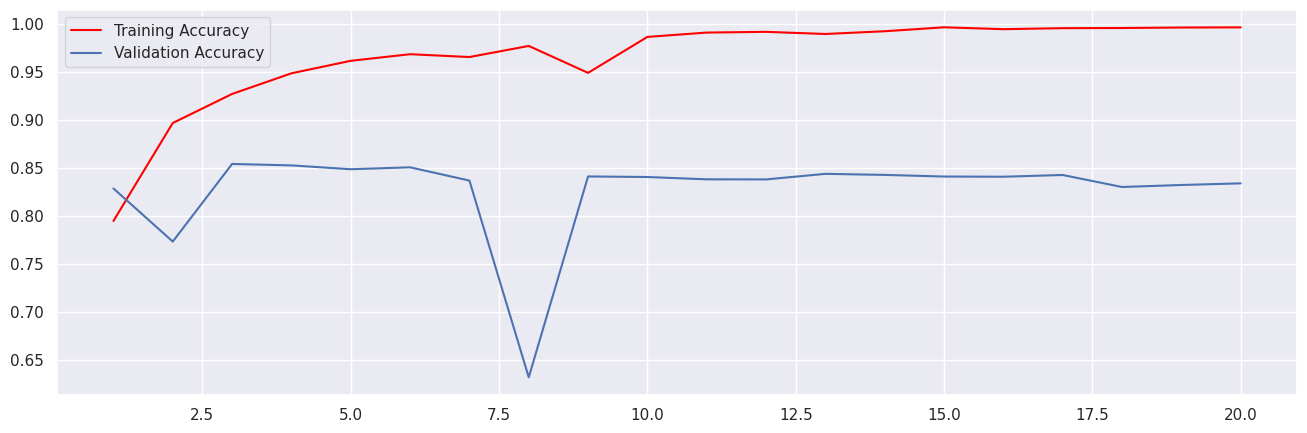

In [ ]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:

validation_sentence = ['The movie was good but it was boring.']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded = pad_sequences (validation_sentence_tokened, maxlen=128,
                                            truncating='post', padding='post')
print(validation_sentence[0])
print("probability of positive: {}".format(model.predict(validation_sentence_padded)[0]))

The movie was good but it was boring.
1/1 [==============================] - 0s 22ms/step
probability of positive: [0.02411283]
